## Importing the needed libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

## Importing the *orders* data set

In [2]:
orders_path = '../orders_after_cleaning.csv'

Dob - date of birth;

PoR - customer place of residence;

EDT - expected delivery time;

ADT - actual delivery time; 

RoR - reason of return

In [3]:
df_orders = pd.read_csv(orders_path,
                        #parse_dates=['DoB', 'Order date'], //Way too slow
                        dtype=
                        {'Customer number': np.int64,
                         'Gender': object,
                         'PoR': object,
                         'Order number': np.int64,
                         'Product number': object,
                         'Sub category': object,
                         'Category': object,
                         'Count': np.int16,
                         'Price': np.float64,
                         'EDT': np.int16,
                         'ADT': np.int16,
                         'RoR': object,
                         'Rating': np.int8,
                         'Returned': np.float64,
                         'Price per Product': np.float64,
                         'Man': np.float64,
                         'Woman': np.float64,
                         'Age': np.int64,
                         'Order month': np.int64,
                         'Order year': np.int64,
                         'DeltaT': np.int64})

In [4]:
df_furniture = df_orders.copy().loc[df_orders['Category']=='Garden furniture']

In [5]:
df_furniture.head(10)

,Unnamed: 0,Customer number,DoB,Gender,PoR,Order number,Order date,Product number,Sub category,Category,...,RoR,Rating,Returned,Price per Product,Man,Woman,Age,Order month,Order year,DeltaT
0,0,1063418,1944-01-15,Woman,Bloemendaal,1251137,2014-12-20,5146308036084,Garden chairs,Garden furniture,...,NaN,-1,0.0,1090.82,0.0,1.0,74,12,2014,718
5,5,1016474,1937-01-16,Man,Hollands Kroon,294578,2014-08-19,8188604007365,Garden chairs,Garden furniture,...,NaN,-1,0.0,940.43,1.0,0.0,81,8,2014,595
8,8,1018918,1974-01-07,Woman,Coevorden,1202222,2014-09-19,3193523049599,Garden sets,Garden furniture,...,No reason given,4,1.0,1079.03,0.0,1.0,44,9,2014,626
13,13,1018918,1974-01-07,Woman,Coevorden,1202222,2014-09-19,3188775004229,Garden chairs,Garden furniture,...,NaN,4,0.0,340.07,0.0,1.0,44,9,2014,626
19,19,1018918,1974-01-07,Woman,Coevorden,1202222,2014-09-19,4169424015147,Garden benches,Garden furniture,...,NaN,4,0.0,1189.15,0.0,1.0,44,9,2014,626
26,26,1032738,1980-01-06,Man,Waterland,997869,2013-07-20,8177666043794,Garden chairs,Garden furniture,...,NaN,-1,0.0,906.65,1.0,0.0,38,7,2013,200
27,27,1029598,1970-01-08,Man,Oss,1606587,2016-07-12,4146448030684,Garden chairs,Garden furniture,...,NaN,-1,0.0,248.06,1.0,0.0,48,7,2016,1288
38,38,1018702,1990-01-03,Man,Terschelling,1433754,2015-12-31,5100706141917,Sun beds,Garden furniture,...,NaN,-1,0.0,66.82,1.0,0.0,28,12,2015,1094
43,43,1060208,1934-01-17,Man,Korendijk,255450,2014-02-06,1130770100774,Sun beds,Garden furniture,...,NaN,-1,0.0,72.87,1.0,0.0,84,2,2014,401
53,53,1068164,1965-01-09,Man,Alphen aan den Rijn,417413,2015-04-20,2142622044388,Garden sets,Garden furniture,...,NaN,-1,0.0,944.79,1.0,0.0,53,4,2015,839


In [6]:
df_furniture['Order date'] = pd.to_datetime(df_furniture["Order date"], format="%Y-%m-%d")
df_furniture = df_furniture.sort_values('Order date')
df_furniture = df_furniture.groupby('Order date')['Count'].sum().reset_index()
df_furniture = df_furniture.set_index('Order date')
df_furniture.head(10)

,Count
Order date,
2013-01-01,1844
2013-01-02,1350
2013-01-03,1878
2013-01-04,980
2013-01-05,966
2013-01-06,324
2013-01-07,1744
2013-01-08,1632
2013-01-09,465


In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [34]:
model = ARIMA(df_furniture['Count'], order=(5,0,0))
results = model.fit(disp=0)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signa

In [35]:
forecast = results.predict(start = '01/01/2013', end = '01/01/2019')

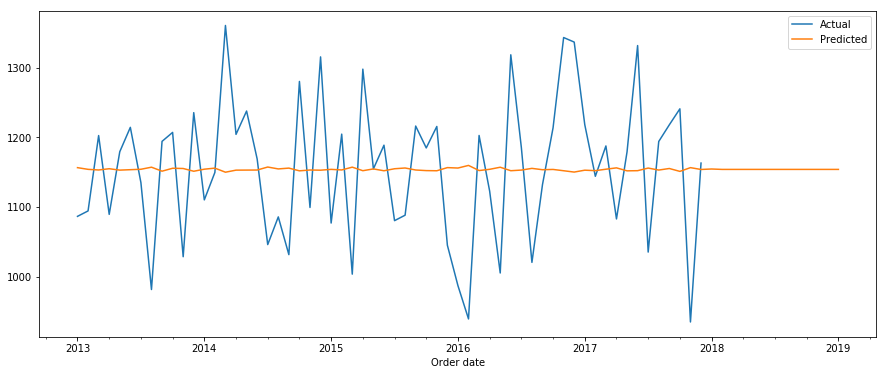

In [45]:
resampled = df_furniture['Count'].resample('MS').mean()
resampled.plot(figsize=(15, 6), label="Actual")
resampled_forecast = forecast.resample('MS').mean()
resampled_forecast.plot(figsize=(15, 6), label="Predicted")
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import mean_squared_error
test_score = mean_squared_error(df_furniture['Count'][1:], forecast[1:len(df_furniture['Count'])])
print('Test MSE: %.3f' % test_score)

Test MSE: 291042.419


In [39]:
print(results.summary())

                              ARMA Model Results                              
Dep. Variable:                  Count   No. Observations:                 1826
Model:                     ARMA(5, 0)   Log Likelihood              -14077.958
Method:                       css-mle   S.D. of innovations            539.576
Date:                Fri, 23 Nov 2018   AIC                          28169.915
Time:                        09:37:06   BIC                          28208.485
Sample:                    01-01-2013   HQIC                         28184.143
                         - 12-31-2017                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1154.1427     12.428     92.864      0.000    1129.784    1178.502
ar.L1.Count     0.0108      0.023      0.463      0.644      -0.035       0.057
ar.L2.Count    -0.0136      0.023     -0.581    

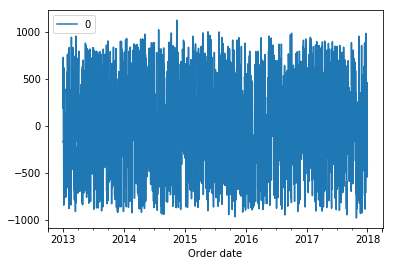

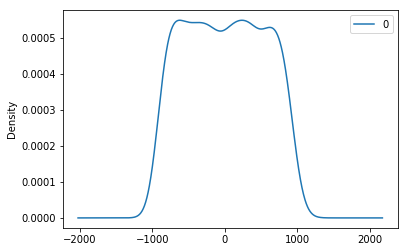

                 0
count  1826.000000
mean      0.001023
std     539.725104
min    -976.557144
25%    -465.129647
50%       6.153896
75%     463.499397
max    1125.068985


In [40]:
# plot residual errors
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [41]:
print(df_furniture['Forecast'])

Order date
2013-01-01    1154.142728
2013-01-02    1160.853426
2013-01-03    1147.034161
2013-01-04    1158.165091
2013-01-05    1115.658103
2013-01-06    1164.688996
2013-01-07    1124.451708
2013-01-08    1197.448358
2013-01-09    1154.181459
2013-01-10    1167.793779
2013-01-11    1112.362032
2013-01-12    1161.347358
2013-01-13    1194.834071
2013-01-14    1146.704319
2013-01-15    1130.742125
2013-01-16    1156.005364
2013-01-17    1189.394149
2013-01-18    1162.682393
2013-01-19    1132.460040
2013-01-20    1155.706291
2013-01-21    1168.370153
2013-01-22    1164.487590
2013-01-23    1163.623085
2013-01-24    1172.647290
2013-01-25    1139.361572
2013-01-26    1182.621168
2013-01-27    1138.466741
2013-01-28    1133.247444
2013-01-29    1157.045961
2013-01-30    1185.173473
                 ...     
2017-12-02    1206.128114
2017-12-03    1140.758278
2017-12-04    1132.690527
2017-12-05    1158.133664
2017-12-06    1182.631918
2017-12-07    1127.992250
2017-12-08    1163.969582
2